In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_metrics(log_file):
    with open(log_file, 'r') as temp:
        lines = temp.readlines()
        
    # Get metrics
    train_dict = {'Step': [], 'Acc': [], 'Loss': []}
    eval_dict = {'Step': [], 'Acc': [], 'Loss': []}
    is_conf_line = True
    conf = ''
    
    for line in lines:
        info = None
            
        if '[TRAIN]' in line:
            is_conf_line = False
            items = line.split('[TRAIN]')[-1].split(';')
            for item in items:
                key, value = item.strip().split(':')
                train_dict[key].append(float(value))
        if '[EVAL]' in line:
            items = line.split('[EVAL]')[-1].split(';')
            for item in items:
                key, value = item.strip().split(':')
                eval_dict[key].append(float(value))
                
        if is_conf_line:
            if 'INFO:' in line:
                line = line.split('INFO:')[-1].strip() + '\n'
            conf += line
            
    return conf, train_dict, eval_dict

In [3]:
log_file = 'lenet/train_15_wd_1e-6_1.log'
conf, train_dict, eval_dict = get_metrics(log_file)

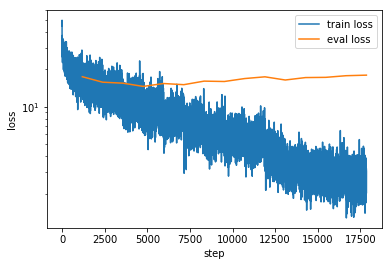

In [4]:
plt.plot(train_dict['Step'], train_dict['Loss'], label='train loss')
plt.plot(eval_dict['Step'], eval_dict['Loss'], label='eval loss')
plt.yscale('log')
plt.legend()
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

In [5]:
print(conf)

### Model ###
LeNet5(
  (convnet): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): ReLU()
    (8): Conv2d(120, 240, kernel_size=(5, 5), stride=(1, 1))
    (9): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=240, out_features=84, bias=True)
    (1): ReLU()
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)
### Optimizer ###
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 1e-06
)
### Scheduler ###
### HParams ###
n_epochs: 15 ; data: ferplus ; label: ferplus_votes ; batch_size: 24 ; lr: 0.001 ; wd: 1e-06 ; init: kaiming_he ; scheduler_patience:

In [8]:
print(eval_dict['Loss'])

[17.47, 15.786, 15.5, 14.597, 15.401, 15.074, 16.097, 15.989, 16.885, 17.438, 16.438, 17.195, 17.268, 17.801, 17.985]
